In [18]:
import matplotlib.pyplot as plt
import numpy as np
from utils.objects import GenerationClass
from utils.config import color_maps, ycb_heights
import os
from glob import glob

# save_dir = "../final_data/"
# move_one_dir = os.path.join(save_dir, "move")
# move_cube_dir = os.path.join(move_one_dir, "cube")
# move_ycb_dir = os.path.join(move_one_dir, "ycb")
# os.makedirs(move_one_dir, exist_ok=True)
# os.makedirs(move_cube_dir, exist_ok=True)
# os.makedirs(move_ycb_dir, exist_ok=True)

In [19]:
model_paths = sorted(glob("../data/mani_skill2_ycb/models/*"), key=lambda x: int(x.split('/')[-1][:3]))
gen = GenerationClass(model_paths)

In [20]:
# move one object
obj_cfgs, camera_cfgs = gen.cube_configs(1)

random_scales = np.random.permutation(np.arange(3, 7))
colors = np.random.choice(list(color_maps.keys()), 4, replace=False)

obj_configs= [{
    "name": "cube", 
    "scale": random_scales[0],
    "color": color_maps[colors[0]],
    "color_name": colors[0],
    "static": True,
}]
# obj_cfgs, camera_cfgs = gen.ycb_configs(4)

env = gen.get_env(obj_cfgs, camera_cfgs)

2024-03-20 00:34:07,692 - mani_skill2 - WARNING - Override registered env CustomEnv-v0
[2024-03-20 00:34:07.693] [svulkan2] [warning] A second renderer will share the same internal context with the first one. Arguments passed to constructor will be ignored.


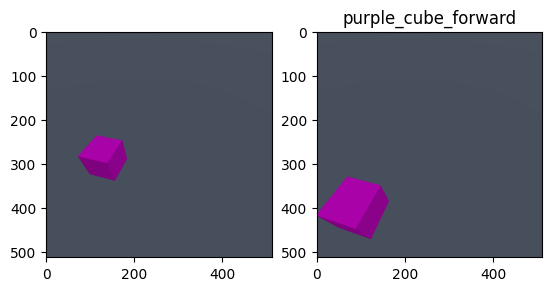

In [30]:
one_obj_directions = ["forward", "backward", "right", "left"]

gen.initialize_random_positions()
fig, axs = plt.subplots(1, 2)
obs, _, _, _, _ = env.step(np.zeros(len(env.action_space.sample())))
axs[0].imshow(obs['image']['base_camera']['rgb'])

rand_idx = np.random.choice(len(env.objs))
obj = env.objs[rand_idx]
direction = np.random.choice(one_obj_directions)

gen.place_object_in_direction(obj, direction)

obs, _, _, _, _ = env.step(np.zeros(len(env.action_space.sample())))
axs[1].imshow(obs['image']['base_camera']['rgb'])


if obj.name == "cube":
    plt.title(obj_cfgs[rand_idx]["color_name"]+f"_{obj.name}_{direction}")
else:
    plt.suptitle(obj.name+f"_{direction}")

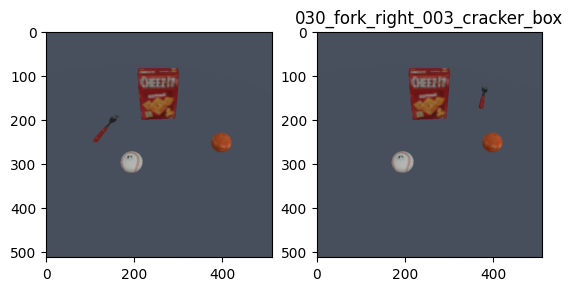

In [16]:
two_objs_directions = ["front", "behind", "right", "left", "top"]


gen.initialize_random_positions()
fig, axs = plt.subplots(1, 2)
obs, _, _, _, _ = env.step(np.zeros(len(env.action_space.sample())))
axs[0].imshow(obs['image']['base_camera']['rgb'])

two_objs_direction = np.random.choice(two_objs_directions)
rand = np.random.choice(np.arange(len(obj_cfgs)), 2, replace=False)

obj1 = env.unwrapped.objs[rand[0]]
obj2 = env.unwrapped.objs[rand[1]]

gen.place_object_on_another(obj1, obj2, two_objs_direction)

obs, _, _, _, _ = env.step(np.zeros(len(env.action_space.sample())))
axs[1].imshow(obs['image']['base_camera']['rgb'])

if obj1.name == "cube":
    cube_1 = obj_cfgs[rand[0]]["color_name"]
    cube_2 = obj_cfgs[rand[1]]["color_name"]
    plt.title(cube_1+f"_{two_objs_direction}_{cube_2}")
else:
    plt.title(obj1.name+f"_{two_objs_direction}_{obj2.name}")
plt.show()

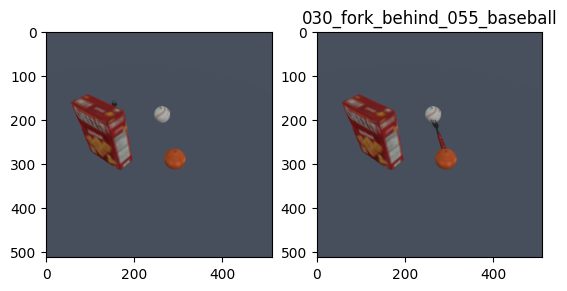

In [18]:
two_objs_directions = ["front", "behind", "right", "left", "top"]


gen.initialize_random_positions()
fig, axs = plt.subplots(1, 2)
obs, _, _, _, _ = env.step(np.zeros(len(env.action_space.sample())))
axs[0].imshow(obs['image']['base_camera']['rgb'])

two_objs_direction = np.random.choice(two_objs_directions)
rand = np.random.choice(np.arange(len(obj_cfgs)), 2, replace=False)
single_rand = np.random.choice(np.arange(len(obj_cfgs)), 1)

obj1 = env.unwrapped.objs[rand[0]]
obj2 = env.unwrapped.objs[rand[1]]
obj3 = env.unwrapped.objs[single_rand[0]]

gen.place_object_in_between(obj1, obj2, obj3)

obs, _, _, _, _ = env.step(np.zeros(len(env.action_space.sample())))
axs[1].imshow(obs['image']['base_camera']['rgb'])

if obj1.name == "cube":
    cube_1 = obj_cfgs[rand[0]]["color_name"]
    cube_2 = obj_cfgs[rand[1]]["color_name"]
    plt.title(cube_1+f"_between_{cube_2}")
else:
    plt.title(obj1.name+f"_between_{obj2.name}")
plt.show()

2024-03-13 21:13:56,403 - mani_skill2 - WARNING - Override registered env CustomEnv-v0
[2024-03-13 21:13:56.404] [svulkan2] [warning] A second renderer will share the same internal context with the first one. Arguments passed to constructor will be ignored.
/home/mkim/miniconda3/envs/mixlab/lib/python3.8/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_articulations to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_articulations` for environment variables or `env.get_wrapper_attr('get_articulations')` that will search the reminding wrappers.
  logger.warn(


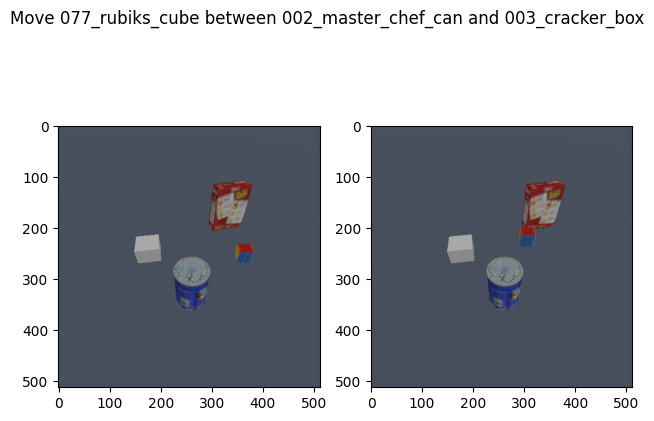

True


In [6]:



fig, axs = plt.subplots(1, 2)
obs, _, _, _, _ = env.step(np.zeros(len(env.action_space.sample())))
axs[0].imshow(obs['image']['base_camera']['rgb'])

one_obj_directions = ["forward", "backward", "right", "left"]
two_objs_directions = ["front", "behind", "right", "left", "top"]

# single_rand = np.random.choice(np.arange(len(configs)), 1)
# rand = np.random.choice(np.arange(len(configs)), 2, replace=False)

# obj1 = env.unwrapped.objs[rand[0]]
# obj2 = env.unwrapped.objs[rand[1]]
# obj3 = env.unwrapped.objs[single_rand[0]]

# one_obj_direction = np.random.choice(one_obj_directions)
# place_object_in_direction(env, obj1, one_obj_direction, 0.4)

# two_objs_direction = np.random.choice(two_objs_directions)
# place_object_on_another(env, obj2, obj3, two_objs_direction, 0.3)

rand = np.random.choice(np.arange(len(configs)), 3, replace=False)
obj1 = env.unwrapped.objs[rand[0]]
obj2 = env.unwrapped.objs[rand[1]]
obj3 = env.unwrapped.objs[rand[2]]
place_object_in_between(obj1, obj2, obj3)

obs, _, _, _, _ = env.step(np.zeros(len(env.action_space.sample())))
axs[1].imshow(obs['image']['base_camera']['rgb'])
# plt.suptitle(f"Move {obj1.name} {one_obj_direction} and {obj2.name} {two_objs_direction} of {obj3.name}")
plt.suptitle(f"Move {obj1.name} between {obj2.name} and {obj3.name}")
plt.tight_layout()
plt.show()

# make sure all objects are present
ids = [obj.id for obj in env.unwrapped.objs]

all_present = np.all(np.isin(ids, np.unique(obs['image']['base_camera']["Segmentation"])))
print(all_present)


2024-03-13 20:44:48,565 - mani_skill2 - WARNING - Override registered env CustomEnv-v0
[2024-03-13 20:44:48.566] [svulkan2] [warning] A second renderer will share the same internal context with the first one. Arguments passed to constructor will be ignored.


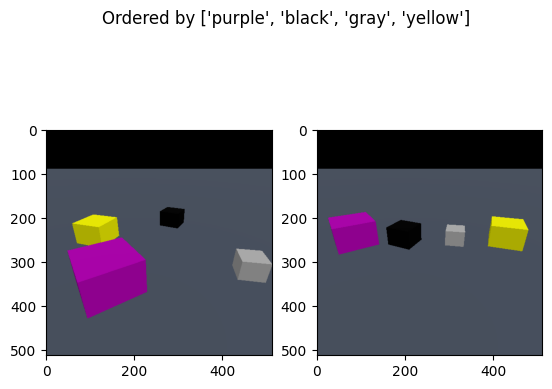

In [231]:
colors = np.random.choice(list(color_maps.keys()), 4, replace=False)
random_scales = np.random.permutation(np.arange(3, 7))

configs= [{
    "name": "cube", 
    "scale": random_scales[i],
    "color": color_maps[colors[i]],
    "color_name": colors[i],
    "static": True,
} for i in range(4)]

env = get_env(configs, {"p": [-1, 0, 0.5], "fov": 1.2})
initialize_positions(configs, min_dist=min_distance)

fig, axs = plt.subplots(1, 2)
obs, _, _, _, _ = env.step(np.zeros(len(env.action_space.sample())))
axs[0].imshow(obs['image']['base_camera']['rgb'])


order_list = [configs[i]["color_name"] for i in range(len(env.unwrapped.objs))][::-1]
order_by_color(env, order_list, colors)
obs, _, _, _, _ = env.step(np.zeros(len(env.action_space.sample())))
axs[1].imshow(obs['image']['base_camera']['rgb'])
plt.suptitle(f"Ordered by {order_list}")
plt.show()

2024-03-13 20:44:45,732 - mani_skill2 - WARNING - Override registered env CustomEnv-v0
[2024-03-13 20:44:45.733] [svulkan2] [warning] A second renderer will share the same internal context with the first one. Arguments passed to constructor will be ignored.
/home/mkim/miniconda3/envs/mixlab/lib/python3.8/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_articulations to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_articulations` for environment variables or `env.get_wrapper_attr('get_articulations')` that will search the reminding wrappers.
  logger.warn(
/home/mkim/miniconda3/envs/mixlab/lib/python3.8/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.objs to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.objs` for environment variables or `env.get_wrapper_attr('objs')` that will search the reminding wrap

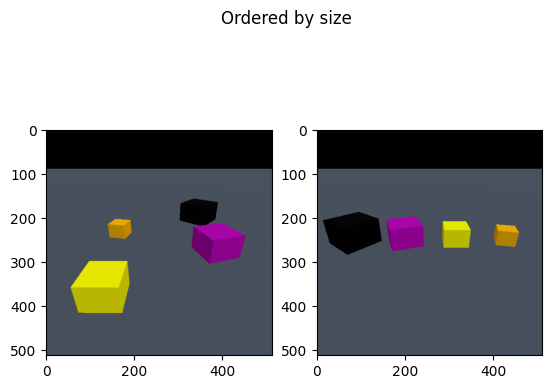

In [230]:
colors = np.random.choice(list(color_maps.keys()), 4, replace=False)
random_scales = np.random.permutation(np.arange(3, 7))
configs= [{
    "name": "cube", 
    "scale": random_scales[i],
    "color": color_maps[colors[i]],
    "color_name": colors[i],
    "static": True,
} for i in range(4)]

env = get_env(configs, {"p": [-1, 0, 0.5], "fov": 1.2})
initialize_positions(configs, min_dist=min_distance)

fig, axs = plt.subplots(1, 2)
obs, _, _, _, _ = env.step(np.zeros(len(env.action_space.sample())))
axs[0].imshow(obs['image']['base_camera']['rgb'])
order_by_size(env, configs)

obs, _, _, _, _ = env.step(np.zeros(len(env.action_space.sample())))
axs[1].imshow(obs['image']['base_camera']['rgb'])
plt.suptitle(f"Ordered by size")
plt.show()

2024-03-13 20:55:44,554 - mani_skill2 - WARNING - Override registered env CustomEnv-v0
[2024-03-13 20:55:44.555] [svulkan2] [warning] A second renderer will share the same internal context with the first one. Arguments passed to constructor will be ignored.
/home/mkim/miniconda3/envs/mixlab/lib/python3.8/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_articulations to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_articulations` for environment variables or `env.get_wrapper_attr('get_articulations')` that will search the reminding wrappers.
  logger.warn(


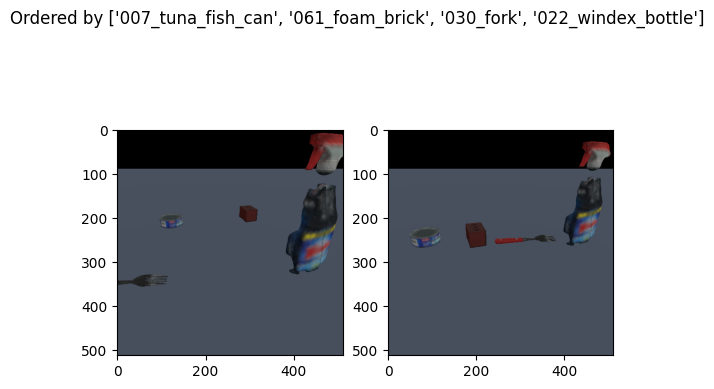

In [264]:
def get_ycb_order_config(model_paths):
    model_paths = sorted(glob("../data/mani_skill2_ycb/models/*"), key=lambda x: int(x.split('/')[-1][:3]))
    configs = [
        {
            "name": model_paths[i],
            "scale": 2,
            "static": True,
        }
        for i in np.random.choice(np.arange(len(model_paths)), 4, replace=False).astype(int)
    ]
    camera_cfgs = {"p": [-1, 0, 0.5], "fov": 1.2}
    return configs, camera_cfgs

configs, camera_cfgs = get_ycb_order_config(model_paths)
env = get_env(configs, camera_cfgs)
initialize_positions(configs, min_dist=min_distance)

fig, axs = plt.subplots(1, 2)
obs, _, _, _, _ = env.step(np.zeros(len(env.action_space.sample())))
axs[0].imshow(obs['image']['base_camera']['rgb'])

name_list = [c["name"] for c in configs][::-1]
name_list_str = [c.split('/')[-1] for c in name_list]
order_by_name(env, name_list, configs)
obs, _, _, _, _ = env.step(np.zeros(len(env.action_space.sample())))
axs[1].imshow(obs['image']['base_camera']['rgb'])


plt.suptitle(f"Ordered by {name_list_str}")
plt.show()

In [265]:
def get_motion_configs(model_paths):
    configs = [
        {
            "name": model_paths[i],
            "scale": 2,
            "static": False,
        }
        for i in np.random.choice(np.arange(len(model_paths)), 4, replace=False).astype(int)
    ]
    return configs

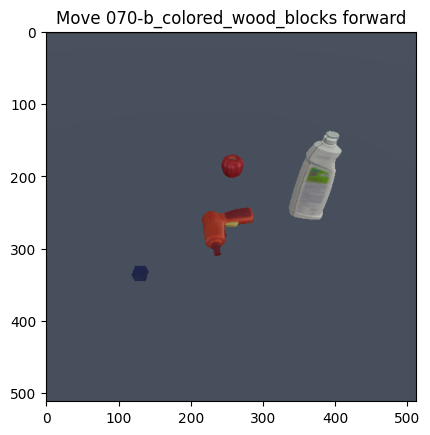

In [266]:
# motion
model_paths = sorted(glob("../data/mani_skill2_ycb/models/*"), key=lambda x: int(x.split('/')[-1][:3]))
configs = get_motion_configs(model_paths)
env = get_env(configs)

initialize_positions(configs, min_dist=min_distance)
random_force = np.random.choice([-250, 250], 3)


random_force = get_random_force()

random_force[2] = 0
motion_map = {
    "forward": np.array([-250, 0, 0]),
    "backward": np.array([250, 0, 0]),
    "right": np.array([0, -250, 0]),
    "left": np.array([0, 250, 0]),
    "random": random_force,
    # "up": np.array([0, 0, 125]), # hard to determine between direction
}


rand_obj = np.random.choice(env.unwrapped.objs)
rand_direction = np.random.choice(list(motion_map.keys()))

[obj.set_velocity(np.array([0, 0, 0])) for obj in env.unwrapped.objs]

# rand_obj = env.objs[0]
# rand_direction = "random"
# rand_direction = "up"


for i in range(1, 9):  # Simulate for 1 second
    move_object(rand_obj, rand_direction, motion_map, 1/i)
    # env.obj.add_force_at_point(np.array([0, 0 , 1000]), np.array([0, 0, 0]))
    obs, _, _, _, _ = env.step(np.zeros(len(env.action_space.sample())))
    clear_output(wait=True)

    plt.imshow(obs['image']['base_camera']['rgb'])
    plt.title(f"Move {rand_obj.name} {rand_direction}")
    plt.show()
    time.sleep(0.1)

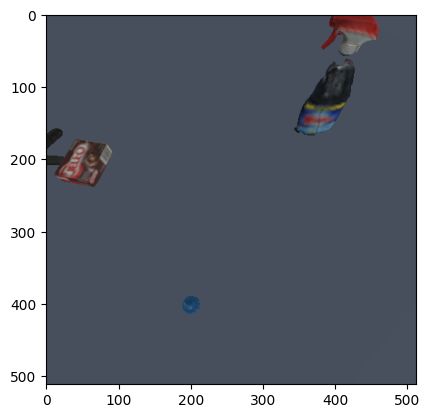

In [89]:
model_paths = sorted(glob("../data/mani_skill2_ycb/models/*"), key=lambda x: int(x.split('/')[-1][:3]))
configs = [
    {
        "name": model_paths[i],
        "scale": 2,
        "static": False,
    }
    for i in np.random.uniform(0, len(model_paths), 4).astype(int)
]


env = get_env(configs)
initialize_positions(configs, min_dist=min_distance)

obj1 = env.unwrapped.objs[0]
obj2 = env.unwrapped.objs[1]

direction = get_object_to_object_direction(obj1, obj2)

for i in range(1, 9):  # Simulate for 1 second
    move_object_toward_another(obj1, direction, 1/(np.sqrt(i)))
    obs, _, _, _, _ = env.step(np.zeros(len(env.action_space.sample())))
    clear_output(wait=True)

    plt.imshow(obs['image']['base_camera']['rgb'])
    plt.show()
    time.sleep(0.1)